In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add the target column

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Partition into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Scale features using StandardScaler (Only fit on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Print shape to verify
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (455, 30), Test set: (114, 30)


In [3]:
# 1. Train K-Nearest Neighbors (KNN) with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)  # Train on scaled data

# 2. Train Decision Tree with default parameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# 3. Train Random Forest with 100 trees
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models using accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display accuracy
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Display classification reports
# Class 0 (Malignant), Class 1 (Benign)
# Precision: The proportion of correctly predicted positive observations to total predicted positives. A high precision means fewer false positives.
# Recall (Sensitivity or True Positive Rate): The proportion of correctly predicted positive observations to all actual positives. A high recall means fewer false negatives.
# F1-Score: The harmonic mean of precision and recall. A high F1-score indicates a good balance between precision and recall.
# Accuracy: The proportion of correctly classified instances. It gives an overall measure of performance.
# Support: The number of actual occurrences of each class in the test dataset.
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

KNN Accuracy: 0.9561
Decision Tree Accuracy: 0.9298
Random Forest Accuracy: 0.9561

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97    

In [4]:
# Experimenting with different max_depth values for Decision Tree
dt_results = {}
for depth in [3, 5, 10, None]:  # None means no depth limit
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    dt_results[depth] = accuracy_score(y_test, y_pred_dt)

print("\nDecision Tree Accuracy for different max_depth values:")
for depth, acc in dt_results.items():
    print(f"max_depth={depth}: Accuracy={acc:.4f}")

# Experimenting with different max_depth and min_samples_split for Random Forest
rf_results = {}
for depth in [3, 5, 10, None]:  # Try different max_depth values
    for min_samples in [2, 5, 10]:  # Try different min_samples_split values
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=min_samples)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        rf_results[(depth, min_samples)] = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Accuracy for different max_depth and min_samples_split values:")
for (depth, min_samples), acc in rf_results.items():
    print(f"max_depth={depth}, min_samples_split={min_samples}: Accuracy={acc:.4f}")


Decision Tree Accuracy for different max_depth values:
max_depth=3: Accuracy=0.9211
max_depth=5: Accuracy=0.9386
max_depth=10: Accuracy=0.9035
max_depth=None: Accuracy=0.9211

Random Forest Accuracy for different max_depth and min_samples_split values:
max_depth=3, min_samples_split=2: Accuracy=0.9474
max_depth=3, min_samples_split=5: Accuracy=0.9386
max_depth=3, min_samples_split=10: Accuracy=0.9386
max_depth=5, min_samples_split=2: Accuracy=0.9386
max_depth=5, min_samples_split=5: Accuracy=0.9474
max_depth=5, min_samples_split=10: Accuracy=0.9561
max_depth=10, min_samples_split=2: Accuracy=0.9474
max_depth=10, min_samples_split=5: Accuracy=0.9474
max_depth=10, min_samples_split=10: Accuracy=0.9474
max_depth=None, min_samples_split=2: Accuracy=0.9561
max_depth=None, min_samples_split=5: Accuracy=0.9386
max_depth=None, min_samples_split=10: Accuracy=0.9386


In [5]:
# More concise version of results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(name, y_test, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Evaluate each model
knn_results = evaluate_model("KNN", y_test, y_pred_knn)
dt_results = evaluate_model("Decision Tree", y_test, y_pred_dt)
rf_results = evaluate_model("Random Forest", y_test, y_pred_rf)

# Create DataFrame for better visualization
results_df = pd.DataFrame([knn_results, dt_results, rf_results])

# Display results
print(results_df)

           Model  Accuracy  Precision    Recall  F1-score
0            KNN  0.956140   0.946667  0.986111  0.965986
1  Decision Tree  0.921053   0.943662  0.930556  0.937063
2  Random Forest  0.938596   0.957746  0.944444  0.951049


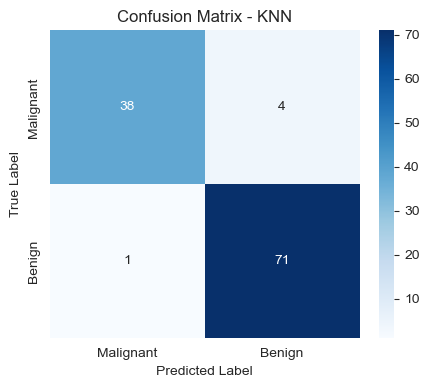

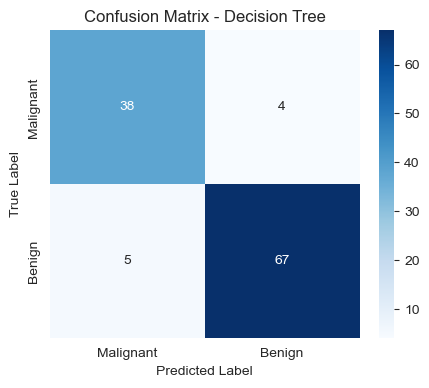

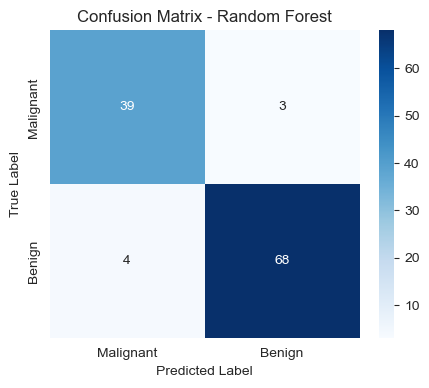

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Generate confusion matrices
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

In [7]:
# Hyperparameter variations
knn_neighbors = [3, 5, 10, 15]
dt_depths = [3, 5, 10, None]  # None means unlimited depth
rf_depths = [3, 5, 10, None]
rf_min_samples_splits = [2, 5, 10]

# Store results
knn_results = []
dt_results = []
rf_results = []

# Experiment with different values of n_neighbors for KNN
for k in knn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    knn_results.append({"Model": "KNN", "n_neighbors": k, "Accuracy": acc})

# Experiment with different max_depth values for Decision Tree
for depth in dt_depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    dt_results.append({"Model": "Decision Tree", "max_depth": depth, "Accuracy": acc})

# Experiment with different max_depth and min_samples_split for Random Forest
for depth in rf_depths:
    for min_samples in rf_min_samples_splits:
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=min_samples)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        rf_results.append({"Model": "Random Forest", "max_depth": depth, "min_samples_split": min_samples, "Accuracy": acc})

# Convert results to DataFrame for better visualization
knn_df = pd.DataFrame(knn_results)
dt_df = pd.DataFrame(dt_results)
rf_df = pd.DataFrame(rf_results)

# Display results
print("\nKNN Hyperparameter Impact:\n", knn_df)
print("\nDecision Tree Hyperparameter Impact:\n", dt_df)
print("\nRandom Forest Hyperparameter Impact:\n", rf_df)


KNN Hyperparameter Impact:
   Model  n_neighbors  Accuracy
0   KNN            3   0.95614
1   KNN            5   0.95614
2   KNN           10   0.95614
3   KNN           15   0.95614

Decision Tree Hyperparameter Impact:
            Model  max_depth  Accuracy
0  Decision Tree        3.0  0.921053
1  Decision Tree        5.0  0.921053
2  Decision Tree       10.0  0.921053
3  Decision Tree        NaN  0.921053

Random Forest Hyperparameter Impact:
             Model  max_depth  min_samples_split  Accuracy
0   Random Forest        3.0                  2  0.947368
1   Random Forest        3.0                  5  0.938596
2   Random Forest        3.0                 10  0.938596
3   Random Forest        5.0                  2  0.938596
4   Random Forest        5.0                  5  0.938596
5   Random Forest        5.0                 10  0.938596
6   Random Forest       10.0                  2  0.956140
7   Random Forest       10.0                  5  0.947368
8   Random Forest       10